<a href="https://colab.research.google.com/github/Maath-Lima/data-science-studies/blob/main/Inside_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model

Carregar o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados


Text(0.5, 1.0, '9')

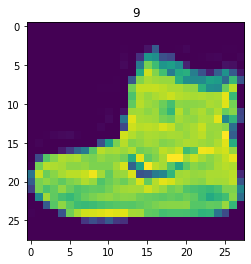

In [3]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [4]:
identificacoes_treino.min()
identificacoes_treino.max()

9

Visualizar as imagens com classificação


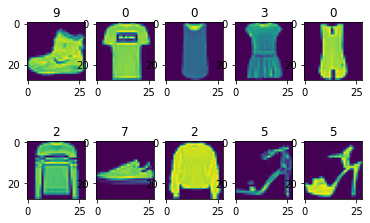

In [5]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Visualizar as imagens com a classificação nomeada


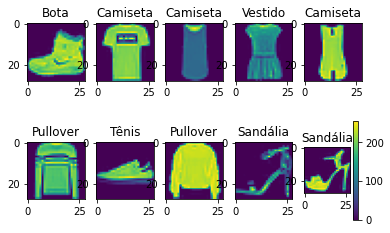

In [6]:
# Visualizar as imagens com a classificação nomeada
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.colorbar()

Normalizando as imagens

In [7]:
imagens_treino= imagens_treino/float(255)

Criação do modelo e normalizando com o dropout

In [8]:
modelo = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(256, activation=tensorflow.nn.relu),
 keras.layers.Dropout(0.2),
 keras.layers.Dense(10, activation=tensorflow.nn.softmax)                 
])

Compilação do modelo

In [20]:
adam = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo.hdf5',
                                             monitor = 'val_loss',
                                             save_best_only = True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Treinamento do modelo

In [21]:
historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       epochs = 5, 
                       validation_split = 0.2, 
                       batch_size = 480,
                       callbacks = callbacks)

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 2/5
100/100 [==============================] - 2s 15ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.0958


Súmario do modelo

In [14]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada dense

In [15]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.07148738, -0.02170048, -0.02044758, ..., -0.01366507,
         0.0356635 , -0.07569745],
       [ 0.01304883,  0.01975038,  0.24488857, ..., -0.0750547 ,
        -0.0356313 ,  0.06605956],
       [ 0.0529388 ,  0.18244669,  0.29616925, ...,  0.01188249,
        -0.23588707, -0.06327245],
       ...,
       [-0.06532656, -0.08452871,  0.18631454, ...,  0.02342576,
         0.09514102,  0.02713113],
       [-0.04954845,  0.11919483,  0.04267403, ..., -0.00806151,
         0.22319186, -0.05888698],
       [ 0.06197278,  0.06160567,  0.00782807, ...,  0.06524481,
         0.12341601,  0.06055089]], dtype=float32)

In [18]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
'''

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0.9305886 , 0.03830647, 0.37174186, ..., 0.24725045, 0.9491966 ,
         0.60502005],
        [0.5878215 , 0.7245799 , 0.6928776 , ..., 0.97329885, 0.5652349 ,
         0.6924338 ],
        [0.31436166, 0.46150726, 0.3631351 , ..., 0.45535666, 0.3328862 ,
         0.80629605],
        ...,
        [0.4899931 , 0.4534727 , 0.86158353, ..., 0.99684644, 0.30168515,
         0.69977325],
        [0.6683493 , 0.2744656 , 0.33097193, ..., 0.19144101, 0.8155788 ,
         0.32666335],
        [0.14711557, 0.20032683, 0.19598706, ..., 0.06676444, 0.23388727,
         0.12833174]], dtype=float32),
 array([-8.50520749e-03,  2.87127584e-01,  2.26576120e-01,  2.15427786e-01,
         1.86157569e-01, -1.10648870e-02,  1.29049495e-01,  5.77727286e-03,
        -2.86132116e-02, -7.74966739e-03,  8.92064422e-02, -2.16161415e-01,
        -1.24557979e-01, -2.93432269e-02,  2.25113109e-01,  1.11200266e-01,
         2.48515932e-03,  3.07596147e-01,  7.36157522e-02,  1.09024495e-01,
         1.112

Vieses da primeira camada dense

In [19]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [20]:
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [39]:
modelo.compile(optimizer='Adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2, batch_size= 480)

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 2.3057 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.1014
Epoch 2/5
100/100 [==============================] - 1s 15ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3023 - val_accuracy: 0.1014
Epoch 3/5
100/100 [==============================] - 2s 17ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3023 - val_accuracy: 0.0959
Epoch 4/5
100/100 [==============================] - 2s 15ms/step - loss: 2.3025 - accuracy: 0.0993 - val_loss: 2.3023 - val_accuracy: 0.0959
Epoch 5/5
100/100 [==============================] - 2s 15ms/step - loss: 2.3024 - accuracy: 0.0987 - val_loss: 2.3024 - val_accuracy: 0.0959


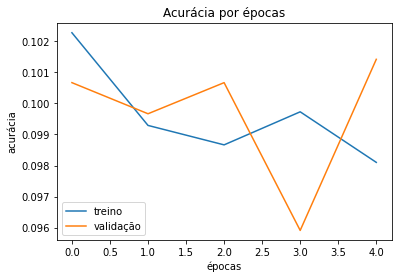

In [36]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

In [23]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

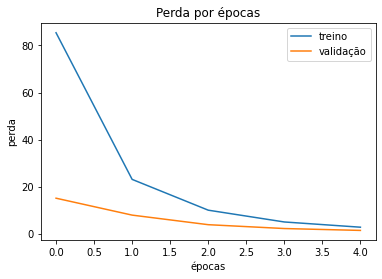

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

Salvando e carregando o modelo treinado 

In [25]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treinamento e validação por época

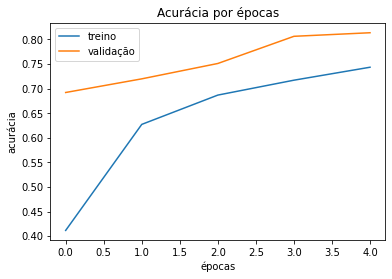

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

plt.title('Acurácia por épocas')

plt.xlabel('épocas')
plt.ylabel('acurácia')

plt.legend(['treino', 'validação'])

Visualizado as perdas de treino e validação por época

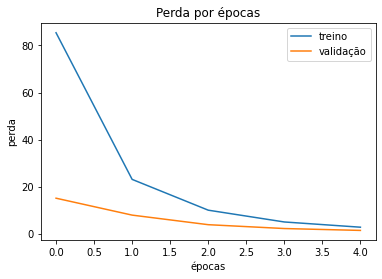

In [27]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

plt.title('Perda por épocas')

plt.xlabel('épocas')
plt.ylabel('perda')

plt.legend(['treino', 'validação'])

Testando o modelo

In [28]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliação do modelo

In [38]:
perde_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print('Perda do teste:', perde_teste)
print('Acurácia do teste:', acuracia_teste)

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)



313/313 [==============================] - 1s 3ms/step - loss: 2.7946 - accuracy: 0.1001
Perda do teste: 2.794550895690918
Acurácia do teste: 0.10010000318288803
